In [2]:
system_message_1 = r"""
You are a systems engineer tasked with analyzing text to identify variables and their causal relationships for constructing a Causal Loop Diagram (CLD). 

1. **Identify Primary Variables**  
   - First, read through the original input text carefully.  
   - Extract all key entities or components (e.g., “salesmen,” “orders,” “product delivery,” “revenue,” etc.).  
   - If certain variables overlap or share commonalities, group them thematically (e.g., “sales workforce,” “budget,” “capacity,” etc.).  

2. **Break Down Sub-Factors**  
   - Within each primary variable, look for nuanced factors that might influence or be influenced by others (e.g., “delivery delay,” “acquisition delay,” “order backlog”).  
---

### Example of How to Apply This Prompt

Example 1:
**Input Excerpt**  
```
"More chickens lay more eggs, which hatch and add to the chicken population.
The more chickens, the more road crossing they will attempt. If there is any
traffic, more road crossings will lead to fewer chickens."
```

**Output**  
### Step 1: Identify Primary Variables  
The key entities or components in the text are:  

1. **Chickens**  
2. **Eggs**  
3. **Road Crossings**  
4. **Traffic**  

---

### Step 2: Break Down Sub-Factors  

For each primary variable, here are the nuanced sub-factors:  

1. **Chickens**  
   - Chicken population size  
   - Chickens attempting to cross roads  

2. **Eggs**  
   - Number of eggs laid  
   - Rate of eggs hatching  

3. **Road Crossings**  
   - Frequency of road crossing attempts by chickens  
   - Success rate of road crossings  

4. **Traffic**  
   - Presence of traffic  
   - Severity or density of traffic impacting road crossings  

Let me know if you'd like further refinement of these factors or additional steps for mapping the causal relationships.

Example 2:

**Input Excerpt**  
```
"Here is a situation in which salesmen book orders followed by
product delivery which generates revenue which produces the sales
budget which permits hiring still more salesmen. In short, salesmen
produce revenue to pay for the further expansion of the sales
effort. Orders booked increase the order backlog which increases the
delivery delay which makes the product less attractive and reduces
the order rate. The ordering of new production capacity is a
function of delivery delay only. Rising order backlog, as indicated
by delivery delay, is taken as an indication of inadequate capacity,
and orders for more capacity are placed. These orders, after an
acquisition delay, add to the production capacity. As the delivery
delay rises, production capacity is raised to bring down the
delivery delay."
```

**Output**  
### Step 1: Identify Primary Variables  
The key entities or components in the text are:  

1. **Salesmen**  
2. **Orders Booked**  
3. **Order Backlog**  
4. **Delivery Delay**  
5. **Product Attractiveness**  
6. **Order Rate**  
7. **Revenue**  
8. **Sales Budget**  
9. **Production Capacity**  
10. **Acquisition Delay**  

---

### Step 2: Break Down Sub-Factors  

For each primary variable, here are the nuanced sub-factors:  

1. **Salesmen**  
   - Number of salesmen  
   - Sales effort exerted  

2. **Orders Booked**  
   - Total number of orders booked  
   - Rate at which orders are booked  

3. **Order Backlog**  
   - Accumulation of unfulfilled orders  
   - Rate of backlog clearance  

4. **Delivery Delay**  
   - Time taken to fulfill orders  
   - Dependency on production capacity  

5. **Product Attractiveness**  
   - Perceived value of the product  
   - Sensitivity to delivery delay  

6. **Order Rate**  
   - Frequency of new orders placed  
   - Dependency on product attractiveness  

7. **Revenue**  
   - Income generated from delivered orders  
   - Dependency on order fulfillment  

8. **Sales Budget**  
   - Allocation of funds for sales operations  
   - Dependency on revenue  

9. **Production Capacity**  
   - Total capacity to produce and fulfill orders  
   - Dependency on acquisition of new capacity  

10. **Acquisition Delay**  
   - Time taken to procure and integrate new production capacity  
   - Dependency on capacity orders  
"""

In [3]:
system_message_2 = r"""
You are a systems engineer tasked with analyzing text to identify variables and their causal relationships for constructing a Causal Loop Diagram (CLD). Follow these steps:

3. **Map Causal Relationships**  
   - For each pair of related variables, specify the relationship in the following format:  
     \[
       [Variable A] --> ([+/-]) [Variable B]
     \]  
     Use **(+)** if an increase in Variable A leads to an increase in Variable B. Use **(-)** if an increase in Variable A leads to a decrease in Variable B.  
   - Provide your **Reasoning** next: Explain how you determined the relationship. If something in the original text supports or illustrates this cause-effect linkage, reference it.  
   - Under **Relevant Text**, include the **exact sentence(s) or phrase(s)** from the original input text that justifies your relationship. Enclose these quotes clearly (e.g., in quotation marks).


---

**Output Format**

For each relationship, follow this exact template:

1. **[Variable A] --> ([+/-]) [Variable B]**  
   **Reasoning:** [Explanation of how/why the relationship is positive or negative, referencing delays and any loops if applicable.]  
   **Relevant Text:** [Exact quote(s) from the original text that substantiate this relationship.]

---

### Example of How to Apply This Prompt

Example 1:
**Input Excerpt**  
```
"More chickens lay more eggs, which hatch and add to the chicken population.
The more chickens, the more road crossing they will attempt. If there is any
traffic, more road crossings will lead to fewer chickens."
```

**Output**  
1. chickens --> (+) eggs  
   Reasoning: Increased chickens lead to more eggs being laid.  
   Relevant Text: "More chickens lay more eggs..."

2. eggs --> (+) chickens  
   Reasoning: Eggs hatch into chickens, thus increasing the chicken population.  
   Relevant Text: "...which hatch and add to the chicken population."

3. road crossing --> (-) chickens  
   Reasoning: More chickens crossing roads, combined with traffic, can lead to a decreased chicken population.  
   Relevant Text: "If there is any traffic, more road crossings will lead to fewer chickens."

Example 2:

**Input Excerpt**  
```
"Here is a situation in which salesmen book orders followed by
product delivery which generates revenue which produces the sales
budget which permits hiring still more salesmen. In short, salesmen
produce revenue to pay for the further expansion of the sales
effort. Orders booked increase the order backlog which increases the
delivery delay which makes the product less attractive and reduces
the order rate. The ordering of new production capacity is a
function of delivery delay only. Rising order backlog, as indicated
by delivery delay, is taken as an indication of inadequate capacity,
and orders for more capacity are placed. These orders, after an
acquisition delay, add to the production capacity. As the delivery
delay rises, production capacity is raised to bring down the
delivery delay."
```

**Output**  
1. Salesmen --> (+) Orders booked
Reasoning: Salesmen are responsible for booking orders which lead to
revenue generation.
Relevant Text: Here is a situation in which salesmen book orders
followed by product delivery which generates revenue which produces the
sales budget which permits hiring still more salesmen.
2. Revenue --> (+) Sales budget
Reasoning: Revenue generated from orders booked contributes to the
sales budget.
Relevant Text: Here is a situation in which salesmen book orders
followed by product delivery which generates revenue which produces the
sales budget which permits hiring still more salesmen.
3. Sales budget --> (+) Salesmen
Reasoning: The sales budget allows for the hiring of more salesmen,
expanding the sales effort.
Relevant Text: Here is a situation in which salesmen book orders
followed by product delivery which generates revenue which produces the
sales budget which permits hiring still more salesmen.
4. Orders booked --> (+) Order backlog
Reasoning: Orders booked contribute to the order backlog.
Relevant Text: Orders booked increase the order backlog which increases
the delivery delay which makes the product less attractive and reduces
the order rate.
5. Order backlog --> (+) Delivery delay
Reasoning: An increase in order backlog leads to longer delivery
delays.
Relevant Text: As the delivery delay rises, production capacity is
raised to bring down the delivery delay.
6. Delivery delay --> (-) Product attractiveness
Reasoning: Longer delivery delays make the product less attractive to
customers.
Relevant Text: Orders booked increase the order backlog which increases
the delivery delay which makes the product less attractive and reduces
the order rate.
7. Product attractiveness --> (-) Order rate
Reasoning: Reduced product attractiveness leads to a decrease in the
order rate.
Relevant Text: Orders booked increase the order backlog which increases
the delivery delay which makes the product less attractive and reduces
the order rate.
8. Delivery delay --> (+) Capacity orders
Reasoning: The decision to order new production capacity is based on
the current delivery delay.
Relevant Text: The ordering of new production capacity is a function of
delivery delay only.
9. Delivery delay --> (+) Capacity orders
Reasoning: Delivery delay is used as an indicator of inadequate
capacity, prompting orders for more capacity.
Relevant Text: Rising order backlog, as indicated by delivery delay, is
taken as an indication of inadequate capacity, and orders for more
capacity are placed.
10. Capacity orders --> (+) Production capacity
Reasoning: After an acquisition delay, the ordered capacity adds to the
existing production capacity.
Relevant Text: These orders, after an acquisition delay, add to the
production capacity.
11. Delivery delay --> (+) Production capacity
Reasoning: As delivery delay increases, production capacity is raised
to reduce the delivery delay.
Relevant Text: As the delivery delay rises, production capacity is
raised to bring down the delivery delay.
12. Production capacity --> (-) Delivery delay
Reasoning: Increased production capacity should reduce the delivery
delay.
Relevant Text: As the delivery delay rises, production capacity is
raised to bring down the delivery delay.
13. Order rate --> (-) Orders booked
Reasoning: Decreased order rate leads to fewer orders booked.
Relevant Text: Orders booked increase the order backlog which increases
the delivery delay which makes the product less attractive and reduces
the order rate.
14. Orders booked --> (-) Revenue
Reasoning: Fewer orders booked would lead to a decrease in revenue.
Relevant Text: Here is a situation in which salesmen book orders
followed by product delivery which generates revenue which produces the
sales budget which permits hiring still more salesmen.
"""

In [4]:
system_message_3 = r"""
You are a systems engineer tasked with analyzing text to identify variables and their causal relationships for constructing a Causal Loop Diagram (CLD). Follow these steps:

4. **Add Feedback Loops**  
   - Identify any cyclical cause-effect paths (e.g., “salesmen → revenue → budget → more salesmen”).  
   - Label loops as either *Reinforcing (R)* or *Balancing (B)*, depending on whether they amplify or stabilize the system.  
   - Include a short note on how the loop works overall, mentioning how the sign of relationships causes growth (reinforcing) or equilibrium (balancing).  

5. **Account for Delays**  
   - If the text mentions time delays in processes (e.g., “acquisition delay,” “delivery delay”), highlight them.  
   - Explain how delays might shift or weaken the speed of the feedback loop’s response.  

6. **Suggest Interventions**  
   - Based on the relationships identified, propose one or more policy or managerial interventions that could alter the system’s outcome (e.g., “shorten acquisition delay,” “increase capacity earlier”).  

---

**Output Format**

For each relationship, follow this exact template:

- A consolidated **Feedback Loops** section, listing and labeling each loop (e.g., Loop R1, Loop B1) and a brief explanation of how it reinforces or balances the system.  
- A brief note on **Delays**, describing their impact on the system.  
- **Suggestions** or recommended interventions.  

---

### Example of How to Apply This Prompt

Example 1:
**Input Excerpt**  
```
"More chickens lay more eggs, which hatch and add to the chicken population.
The more chickens, the more road crossing they will attempt. If there is any
traffic, more road crossings will lead to fewer chickens."
```

**Output**  
Feedback Loops

    Loop R1 (Reinforcing):
    Path: chickens → (+) eggs → (+) chickens
    Explanation: This reinforcing loop demonstrates growth in the chicken population as more chickens lay eggs, which hatch and further increase the population.

    Loop B1 (Balancing):
    Path: chickens → (+) road crossing → (-) chickens
    Explanation: This balancing loop acts to stabilize or decrease the chicken population. As the number of chickens grows, road crossings increase, and traffic reduces the chicken population.

Delays

There may be a time delay between:

    Eggs being laid and chickens hatching. This delay slows the impact of the reinforcing loop (R1).
    Chickens crossing roads and the population being reduced due to traffic. This could introduce a lag in the balancing loop (B1).

Suggestions

    Minimize Road Crossing: Implement barriers or safe crossing zones to reduce traffic-related chicken losses.
    Manage Population Growth: Introduce measures to control the chicken population (e.g., regulating egg production) to avoid overpopulation and excessive road crossings.

Example 2:

**Input Excerpt**  
```
"Here is a situation in which salesmen book orders followed by
product delivery which generates revenue which produces the sales
budget which permits hiring still more salesmen. In short, salesmen
produce revenue to pay for the further expansion of the sales
effort. Orders booked increase the order backlog which increases the
delivery delay which makes the product less attractive and reduces
the order rate. The ordering of new production capacity is a
function of delivery delay only. Rising order backlog, as indicated
by delivery delay, is taken as an indication of inadequate capacity,
and orders for more capacity are placed. These orders, after an
acquisition delay, add to the production capacity. As the delivery
delay rises, production capacity is raised to bring down the
delivery delay."
```

**Output**  
Feedback Loops

    Loop R1 (Reinforcing): Sales Effort Expansion
    Path: salesmen → (+) orders booked → (+) revenue → (+) sales budget → (+) salesmen
    Explanation: This reinforcing loop shows how sales revenue funds the hiring of more salesmen, leading to further growth in sales.

    Loop B1 (Balancing): Delivery Delay Impact on Orders
    Path: orders booked → (+) order backlog → (+) delivery delay → (-) order rate → (-) orders booked
    Explanation: This balancing loop highlights how rising delivery delays reduce the order rate, limiting further growth in orders.

    Loop B2 (Balancing): Capacity Adjustment
    Path: delivery delay → (+) production capacity orders → (+) production capacity (after delay) → (-) delivery delay
    Explanation: This balancing loop regulates delivery delay by adjusting production capacity.

Delays

    Acquisition Delay: There is a delay between placing orders for new production capacity and when it becomes operational.
    Delivery Delay: Time is required to clear the backlog of orders, impacting customer satisfaction and order rates.

Suggestions

    Improve Delivery Times: Invest in production process optimization to reduce delivery delays and retain customer interest.
    Forecast Capacity Needs: Use predictive analytics to anticipate production needs and order capacity proactively, reducing dependency on reactionary measures.
    Balance Sales Growth with Delivery Efficiency: Ensure that sales growth does not outpace production capacity to avoid excessive delivery delays.
"""

In [5]:
# List of system messages for easier looping
system_messages = [system_message_1, system_message_2, system_message_3]


In [6]:
case = r"""
    Patient Information

    Patient Name: Mr. Smith
    Patient ID: 789456
    Date of Birth: 06/25/1965
    Date of Examination: 03/15/2024

MRI Examination Details

    MRI Technique: Multi-parametric MRI with T2-weighted images, diffusion-weighted imaging (DWI), and dynamic contrast-enhanced (DCE) MRI.
    Prostate Volume: 45 cc
    PSA Level: 5.8 ng/mL

MRI Findings

    Lesion 1: Located in the left peripheral zone, mid gland. It shows significant restricted diffusion with a corresponding low ADC value and focal early enhancement on DCE MRI. PI-RADS Score: 5.
    Lesion 2: Located in the right peripheral zone, apex. It has mildly restricted diffusion and no significant enhancement on DCE MRI. PI-RADS Score: 3.
    Lesion 3: Located in the anterior fibromuscular stroma, showing moderate restricted diffusion and no early enhancement. PI-RADS Score: 3."""

In [7]:
from openai import OpenAI

# Define the function
def process_case_study(case_study, system_messages, model="chatgpt-4o-latest", temperature=0.1):
    """
    Process a case study through a series of chained prompts using OpenAI's API.
    
    Parameters:
    - case_study (str): The case study text to process.
    - system_messages (list): List of system messages to structure the prompts.
    - model (str): The GPT model to use. Default is "chatgpt-4o-latest".
    - temperature (float): The creativity level of the model's responses. Default is 0.1.
    
    Returns:
    - dict: A dictionary containing responses for each stage and the final output.
    """
    # Initialize the messages and responses
    messages = []
    responses = {}

    client = OpenAI()

    # Loop through the system messages
    for i, system_message in enumerate(system_messages, start=1):
        # Update messages for the current stage
        if i == 1:
            messages = [
                {"role": "system", "content": system_message},
                {"role": "user", "content": case_study},
            ]
        else:
            messages = [
                {"role": "system", "content": system_message},
                {"role": "user", "content": case_study + "".join(responses[f"Stage_{j}"] for j in range(1, i))},
            ]

        # Make the API call
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            temperature=temperature,
        )

        # Extract the response content
        assistant_reply = response.choices[0].message.content
        responses[f"Stage_{i}"] = assistant_reply

    # Combine all responses for the final output
    final_output = case_study + "".join(responses.values())
    responses["Final_Output"] = final_output

    return responses


In [26]:
# Call the function
responses = process_case_study(case, system_messages)

# Print the final output
print("Final Output:\n", responses["Final_Output"])

Final Output:
 
    Patient Information

    Patient Name: Mr. Smith
    Patient ID: 789456
    Date of Birth: 06/25/1965
    Date of Examination: 03/15/2024

MRI Examination Details

    MRI Technique: Multi-parametric MRI with T2-weighted images, diffusion-weighted imaging (DWI), and dynamic contrast-enhanced (DCE) MRI.
    Prostate Volume: 45 cc
    PSA Level: 5.8 ng/mL

MRI Findings

    Lesion 1: Located in the left peripheral zone, mid gland. It shows significant restricted diffusion with a corresponding low ADC value and focal early enhancement on DCE MRI. PI-RADS Score: 5.
    Lesion 2: Located in the right peripheral zone, apex. It has mildly restricted diffusion and no significant enhancement on DCE MRI. PI-RADS Score: 3.
    Lesion 3: Located in the anterior fibromuscular stroma, showing moderate restricted diffusion and no early enhancement. PI-RADS Score: 3.### Step 1: Identify Primary Variables  
The key entities or components in the text are:  

1. **Patient Information*

In [8]:
def call_openai_for_cld(responses):
    """
    Use OpenAI API to extract causal relationships and feedback loops.
    """
    # Define system prompt for extracting Graphviz-compatible data
    system_message_out = r'''
	You are an expert in generating Graphviz scripts to visualize causal relationships in a Causal Loop Diagram (CLD). 
	
	Follow these steps:
	
	1. **Extract Relationships**:
	   - Identify causal relationships from the provided text.
	   - Each relationship should include a source node, a target node, and an edge sign (e.g., (+) or (-)).
	
	2. **Identify Feedback Loops**:
	   - Detect reinforcing (R) or balancing (B) loops in the relationships.
	   - Clearly label the loops in the Graphviz diagram.
	
	3. **Generate a Graphviz Script**:
	   - Use the `digraph` format to create a Graphviz script that visualizes the causal relationships and feedback loops.
	   - Ensure nodes are connected with directional arrows and labeled with the sign of the relationship (+ or -).
	   - Clearly label each feedback loop (e.g., `Loop R1`, `Loop B1`) near the relevant relationships.
	
	4. **Output Format**:
	   digraph CausalLoopDiagram {rankdir=LR; // Optional: Left-to-right layout
	   // Define nodes and relationships
	   "Node A" -> "Node B" [label="+"];
	   "Node B" -> "Node C" [label="-"];
	   "Node C" -> "Node A" [label="+"];
	
	   // Label feedback loops
	   "Loop R1" [shape=plaintext, label="Reinforcing Loop R1"];
	   "Node A" -> "Loop R1" [style=dotted];
	   }
	
	Generate the Graphviz script directly as shown in the output format. Ensure it is syntactically correct and can be rendered by Graphviz without additional edits.
	
	'''

    # OpenAI API call
    messages = [
        {"role": "system", "content": system_message_out},
        {"role": "user", "content": responses}
    ]

    client = OpenAI()  # Replace with your OpenAI client initialization
    response = client.chat.completions.create(
        model="chatgpt-4o-latest",
        messages=messages,
        temperature=0.1,
    )

    # Extract response content
    return response.choices[0].message.content


In [9]:
import re
from graphviz import Source

# Define a function to extract the Graphviz script
def extract_graphviz_script(openai_output):
    """
    Extracts the Graphviz script from OpenAI's output.
    """
    match = re.search(r"```dot(.*?)```", openai_output, re.DOTALL)
    if match:
        return match.group(1).strip()
    else:
        raise ValueError("No Graphviz script found in the output.")


def render_graphviz(script, output_file="causal_loop_diagram"):
    """
    Renders the Graphviz script into a diagram.
    """
    src = Source(script)
    src.render(output_file, format='png', cleanup=True)
    return src



In [43]:
openai_output = call_openai_for_cld(responses["Final_Output"])
print(openai_output)

### Step 7: Generate Graphviz Script  

Below is the Graphviz script to visualize the causal relationships and feedback loops identified in the analysis:

```dot
digraph CausalLoopDiagram {
    rankdir=LR; // Left-to-right layout for better readability

    // Define nodes and relationships
    "Prostate Volume" -> "PSA Level" [label="+"];
    "PSA Level" -> "PI-RADS Score" [label="+"];
    "MRI Technique" -> "Lesion Detection" [label="+"];
    "Lesion Detection" -> "Lesion Characteristics" [label="+"];
    "Lesion Characteristics" -> "PI-RADS Score" [label="+"];
    "PI-RADS Score" -> "Cancer Suspicion" [label="+"];
    "Lesion Location" -> "Lesion Characteristics" [label="+"];

    // Feedback Loops
    // Reinforcing Loop R1
    "Loop R1" [shape=plaintext, label="Reinforcing Loop R1"];
    "Prostate Volume" -> "Loop R1" [style=dotted];
    "Loop R1" -> "PSA Level" [style=dotted];

    // Reinforcing Loop R2
    "Loop R2" [shape=plaintext, label="Reinforcing Loop R2"];
    "MRI Techn

In [56]:
graphviz_script = extract_graphviz_script(openai_output)

# Render the diagram
rendered_diagram = render_graphviz(graphviz_script)
rendered_diagram.view()


'causal_loop_diagram.pdf'

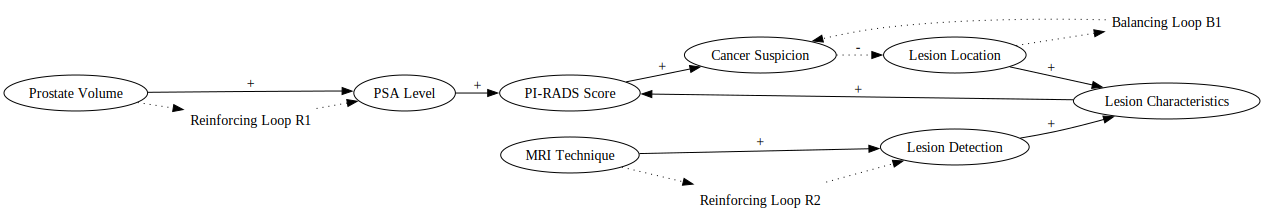

In [51]:
rendered_diagram

In [63]:
# Assuming responses["Final_Output"] and openai_output are strings
combined_output = f"""
{responses["Final_Output"]}

---

{openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(combined_output)

print(f"Output successfully saved to {file_name}")



Output successfully saved to combined_output.md


## Testing with Different Examples

### Case #1
More chickens lay more eggs, which hatch and add to the chicken population. The more chickens, the more road crossing they will attempt. If there is any traffic, more road crossings will lead to fewer chickens. 

- number of links in the text: 4
- number of loops in the text: 2

In [17]:
case01 = r"""
More chickens lay more eggs, which hatch and add to the chicken population. The more chickens, the more road crossing they will attempt. If there is any traffic, more road crossings will lead to fewer chickens. 
"""

In [18]:
case01_responses = process_case_study(case01, system_messages)
case01_openai_output = call_openai_for_cld(case01_responses["Final_Output"])

case01_graphviz_script = extract_graphviz_script(case01_openai_output)

In [19]:
case01_rendered_diagram = render_graphviz(case01_graphviz_script, output_file = "case01_causal_loop_diagram")
case01_rendered_diagram.view()

'case01_causal_loop_diagram.pdf'

In [20]:
case01_output = f"""
{case01_responses["Final_Output"]}

---

{case01_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case01_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case01_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case01_combined_output.md


### Case #2
a change in price changes demand and supply with some delay, and demand and supply in turn influence price.

- number of links in the text: 5
- number of loops in the text: 2

In [21]:
case02 = r"""
a change in price changes demand and supply with some delay, and demand and supply in turn influence price.
"""

In [22]:
case02_responses = process_case_study(case02, system_messages)
case02_openai_output = call_openai_for_cld(case02_responses["Final_Output"])

case02_graphviz_script = extract_graphviz_script(case02_openai_output)

In [23]:
case02_rendered_diagram = render_graphviz(case02_graphviz_script, output_file = "case02_causal_loop_diagram")
case02_rendered_diagram.view()

'case02_causal_loop_diagram.pdf'

In [55]:
case02_output = f"""
{case02_responses["Final_Output"]}

---

{case02_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case02_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case02_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case02_combined_output.md


### Case #3

"The United States responds to a perceived Threat to Americans by increasing U.S. military activities, which increases the Perceived Aggressiveness of the U.S., which leads to more Terrorist Recruits, which eventually leads to more Terrorist Activities and increases the Threat to the United States, which leads to more U.S. military activities, which increases the Terrorist Recruits."

- number of links in the text: 6
- number of loops in the text: 1

In [64]:
case03 = r'''
The United States responds to a perceived Threat to Americans by increasing U.S. military activities, which increases the Perceived Aggressiveness of the U.S., which leads to more Terrorist Recruits, which eventually leads to more Terrorist Activities and increases the Threat to the United States, which leads to more U.S. military activities, which increases the Terrorist Recruits.
'''

case03_responses = process_case_study(case03, system_messages)
case03_openai_output = call_openai_for_cld(case03_responses["Final_Output"])

case03_graphviz_script = extract_graphviz_script(case03_openai_output)

In [66]:
case03_rendered_diagram = render_graphviz(case03_graphviz_script, output_file = "case03_causal_loop_diagram")
case03_rendered_diagram.view()

'case03_causal_loop_diagram.pdf'

In [68]:
case03_output = f"""
{case03_responses["Final_Output"]}

---

{case03_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case03_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case03_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case03_combined_output.md


### Case #4

"Busy managers are often tempted to bring in human resource specialists to sort out personnel problems. The HR expert may solve the problem, but the manager's ability to solve other related problems has not improved. Eventually, other personnel issues will arise and the manager will be just as dependent on the HR expert as before. The very fact that the outside expert was used successfully before makes it even easier to turn to expert again."

- number of links in the text: 6
- number of loops in the text: 3

In [26]:
case04 = r"""
Busy managers are often tempted to bring in human resource specialists to sort out personnel problems. The HR expert may solve the problem, but the manager's ability to solve other related problems has not improved. Eventually, other personnel issues will arise and the manager will be just as dependent on the HR expert as before. The very fact that the outside expert was used successfully before makes it even easier to turn to expert again.
"""

In [27]:
case04_responses = process_case_study(case04, system_messages)
case04_openai_output = call_openai_for_cld(case04_responses["Final_Output"])

case04_graphviz_script = extract_graphviz_script(case04_openai_output)

In [28]:
case04_rendered_diagram = render_graphviz(case04_graphviz_script, output_file = "case04_causal_loop_diagram")
case04_rendered_diagram.view()

'case04_causal_loop_diagram.pdf'

In [54]:
case04_output = f"""
{case04_responses["Final_Output"]}

---

{case04_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case04_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case04_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case04_combined_output.md


### Case #5

"Alcohol drinking lifts some tension, at least for a while. It relieves the problem symptom. If it didn’t, people wouldn’t drink. But it also gives the person the feeling of having solved the problem, thereby diverting attention from the fundamental problem—controlling the workload. Failing to take a stand may well cause the workload to gradually increase further, since most of us are continually besieged by more demand on our time than we can possibly respond to. Over time, the workload continues to build, the stress returns, and the pressure to drink increases."

- number of links in the text: 6
- number of loops in the text: 3

In [29]:
case05 = r"""
Alcohol drinking lifts some tension, at least for a while. It relieves the problem symptom. If it didn’t, people wouldn’t drink. But it also gives the person the feeling of having solved the problem, thereby diverting attention from the fundamental problem—controlling the workload. Failing to take a stand may well cause the workload to gradually increase further, since most of us are continually besieged by more demand on our time than we can possibly respond to. Over time, the workload continues to build, the stress returns, and the pressure to drink increases.
"""

In [30]:
case05_responses = process_case_study(case05, system_messages)
case05_openai_output = call_openai_for_cld(case05_responses["Final_Output"])

case05_graphviz_script = extract_graphviz_script(case05_openai_output)

In [31]:
case05_rendered_diagram = render_graphviz(case05_graphviz_script, output_file = "case05_causal_loop_diagram")
case05_rendered_diagram.view()

'case05_causal_loop_diagram.pdf'

In [53]:
case05_output = f"""
{case05_responses["Final_Output"]}

---

{case05_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case05_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case05_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case05_combined_output.md


### Case #6

"The productivity  of  investment in exploration is negatively influenced by the discovery rate. Suppose the discovery rate is increased. Then less remains to be discovered with current technology, and the productivity of further investment in exploration  is reduced. It  is assumed that the yield  from exploration is exponentially  decreasing with cumulative footage drilled, and that the footage drilled per dollar  invested is constant . The reduction in  productivity  feeds back to the discovery rate, implying a  reduction in the discovery potential  provided by any given level of exploration activity."

- number of links in the text: 8
- number of loops in the text: 1

In [32]:
case06 = r"""
The productivity  of  investment in exploration is negatively influenced by the discovery rate. Suppose the discovery rate is increased. Then less remains to be discovered with current technology, and the productivity of further investment in exploration  is reduced. It  is assumed that the yield  from exploration is exponentially  decreasing with cumulative footage drilled, and that the footage drilled per dollar  invested is constant . The reduction in  productivity  feeds back to the discovery rate, implying a  reduction in the discovery potential  provided by any given level of exploration activity. 
"""

In [33]:
case06_responses = process_case_study(case06, system_messages)
case06_openai_output = call_openai_for_cld(case06_responses["Final_Output"])

case06_graphviz_script = extract_graphviz_script(case06_openai_output)

In [34]:
case06_rendered_diagram = render_graphviz(case06_graphviz_script, output_file = "case06_causal_loop_diagram")
case06_rendered_diagram.view()

'case06_causal_loop_diagram.pdf'

In [52]:
case06_output = f"""
{case06_responses["Final_Output"]}

---

{case06_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case06_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case06_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case06_combined_output.md


### Case #7

"we consider the impact of implemented components on the carry-out and store operations. Some components may lead to new costs, e.g., for acquiring healthier ingredients and finding new suppliers. Benefits may also ensue, including financial benefits due to increased sales or incentives for participation in the study, reputational benefits, and the personal satisfaction of making a contribution to community health. An increase in motivation due to observation of such benefits can lead to further implementation of components, and thus even more benefits… On the other hand, if the storeowner perceives the costs (both financial and time costs) to exceed those benefits, then a balancing loop may dominate which reduces motivation in response to progress, and slows down further implementation.
"

- number of links in the text: 8
- number of loops in the text: 2

In [70]:
case07 = r"""
we consider the impact of implemented components on the carry-out and store operations. Some components may lead to new costs, e.g., for acquiring healthier ingredients and finding new suppliers. Benefits may also ensue, including financial benefits due to increased sales or incentives for participation in the study, reputational benefits, and the personal satisfaction of making a contribution to community health. An increase in motivation due to observation of such benefits can lead to further implementation of components, and thus even more benefits… On the other hand, if the storeowner perceives the costs (both financial and time costs) to exceed those benefits, then a balancing loop may dominate which reduces motivation in response to progress, and slows down further implementation.
"""

In [71]:
case07_responses = process_case_study(case07, system_messages)
case07_openai_output = call_openai_for_cld(case07_responses["Final_Output"])

case07_graphviz_script = extract_graphviz_script(case07_openai_output)

In [72]:
case07_rendered_diagram = render_graphviz(case07_graphviz_script, output_file = "case07_causal_loop_diagram")
case07_rendered_diagram.view()

'case07_causal_loop_diagram.pdf'

In [73]:
case07_output = f"""
{case07_responses["Final_Output"]}

---

{case07_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case07_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case07_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case07_combined_output.md


### Case #8

"A high‑tech organization grows rapidly because of its ability to introduce new products. As new products grow, revenues grow, the R&D budget grows, and the engineering and research staff grows. Eventually, this burgeoning technical staff becomes increasingly complex and difficult to manage. The management burden often falls on senior engineers, who in turn have less time to spend on engineering. Diverging the most experienced engineers from engineering to management results in longer product development times, which slow down the introduction of new products."

- number of links in the text: 9
- number of loops in the text: 2

In [35]:
case08= r"""
A high‑tech organization grows rapidly because of its ability to introduce new products. As new products grow, revenues grow, the R&D budget grows, and the engineering and research staff grows. Eventually, this burgeoning technical staff becomes increasingly complex and difficult to manage. The management burden often falls on senior engineers, who in turn have less time to spend on engineering. Diverging the most experienced engineers from engineering to management results in longer product development times, which slow down the introduction of new products.
"""

In [36]:
case08_responses = process_case_study(case08, system_messages)
case08_openai_output = call_openai_for_cld(case08_responses["Final_Output"])

case08_graphviz_script = extract_graphviz_script(case08_openai_output)

In [37]:
case08_rendered_diagram = render_graphviz(case08_graphviz_script, output_file = "case08_causal_loop_diagram")
case08_rendered_diagram.view()

'case08_causal_loop_diagram.pdf'

In [51]:
case08_output = f"""
{case08_responses["Final_Output"]}

---

{case08_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case08_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case08_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case08_combined_output.md


### Case #9

"Fulfilling the past commitments [is shown]. Increased annual budget leads to more new grants, more new grants result in more future commitments, and that in turn decreases funds for future new grants."

- number of links in the text: 9
- number of loops in the text: 2

In [39]:
case09 = r"""
Fulfilling the past commitments [is shown]. Increased annual budget leads to more new grants, more new grants result in more future commitments, and that in turn decreases funds for future new grants.
"""

In [40]:
case09_responses = process_case_study(case09, system_messages)
case09_openai_output = call_openai_for_cld(case09_responses["Final_Output"])

case09_graphviz_script = extract_graphviz_script(case09_openai_output)

In [41]:
case09_rendered_diagram = render_graphviz(case09_graphviz_script, output_file = "case09_causal_loop_diagram")
case09_rendered_diagram.view()

'case09_causal_loop_diagram.pdf'

In [42]:
case09_output = f"""
{case09_responses["Final_Output"]}

---

{case09_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case09_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case09_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case09_combined_output.md


### Case #10

"In the redundancy solution, when people perceive a gap between the desired level of security and the current level, they go on hiring and deploying more guards, which causes the guard force power to increase. By increasing the guard force power, without considering any other effect, the security rises and adjusts to the desired level. Thus, this dynamic solution suggests that we should continue deploying guards until we feel that security is at its desired level.
"

- number of links in the text: 9
- number of loops in the text: 1

In [43]:
case10 = r"""
In the redundancy solution, when people perceive a gap between the desired level of security and the current level, they go on hiring and deploying more guards, which causes the guard force power to increase. By increasing the guard force power, without considering any other effect, the security rises and adjusts to the desired level. Thus, this dynamic solution suggests that we should continue deploying guards until we feel that security is at its desired level.
"""

In [44]:
case10_responses = process_case_study(case10, system_messages)
case10_openai_output = call_openai_for_cld(case10_responses["Final_Output"])

case10_graphviz_script = extract_graphviz_script(case10_openai_output)

In [45]:
case10_rendered_diagram = render_graphviz(case10_graphviz_script, output_file = "case10_causal_loop_diagram")
case10_rendered_diagram.view()

'case10_causal_loop_diagram.pdf'

In [50]:
case10_output = f"""
{case10_responses["Final_Output"]}

---

{case10_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case10_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case10_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case10_combined_output.md


### Case #11

"In most firms the advertising budget grows roughly as the company and revenue grow. Larger advertising budgets have two effects: (1) more potential customers are made aware of the product and choose to enter the market; (2) to the extent the advertising is effective, more of those who are aware and in market are likely to buy the product offered by the company. Similarly, the larger the revenue of the firm, the greater the sales budget. The more sales representatives, and the greater their skill and experience, the more calls they can make, the more time they can spend with customers, and the more effective their calls will be, increasing both total industry demand and the share of the total demand won by the firm.
"

- number of links in the text: 11
- number of loops in the text: 4

In [46]:
case11 = r"""
In most firms the advertising budget grows roughly as the company and revenue grow. Larger advertising budgets have two effects: (1) more potential customers are made aware of the product and choose to enter the market; (2) to the extent the advertising is effective, more of those who are aware and in market are likely to buy the product offered by the company. Similarly, the larger the revenue of the firm, the greater the sales budget. The more sales representatives, and the greater their skill and experience, the more calls they can make, the more time they can spend with customers, and the more effective their calls will be, increasing both total industry demand and the share of the total demand won by the firm.
"""

In [47]:
case11_responses = process_case_study(case11, system_messages)
case11_openai_output = call_openai_for_cld(case11_responses["Final_Output"])

case11_graphviz_script = extract_graphviz_script(case11_openai_output)

In [48]:
case11_rendered_diagram = render_graphviz(case11_graphviz_script, output_file = "case11_causal_loop_diagram")
case11_rendered_diagram.view()

'case11_causal_loop_diagram.pdf'

In [49]:
case11_output = f"""
{case11_responses["Final_Output"]}

---

{case11_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case11_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case11_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case11_combined_output.md


### Case #12

"The car dealer needs to keep some inventory because deliveries and purchases don’t match perfectly every day. Customers make purchases that are unpredictable on a day-to-day basis. The car dealer also needs to provide herself with some extra inventory (a buffer) in case deliveries from suppliers are delayed occasionally. The dealer monitors sales (perceived sales), and if, for example, they seem to be rising, she adjusts orders to the factory to bring inventory up to her new desired inventory that provides ten days’ coverage at the higher sales rate. So, higher sales mean higher perceived sales, which means a higher discrepancy between inventory and desired inventory, which means higher orders, which will bring in more deliveries, which will raise inventory so it can comfortably supply the higher rate of sales.

"

- number of links in the text: 11
- number of loops in the text: 4

In [56]:
case12 = r"""
The car dealer needs to keep some inventory because deliveries and purchases don’t match perfectly every day. Customers make purchases that are unpredictable on a day-to-day basis. The car dealer also needs to provide herself with some extra inventory (a buffer) in case deliveries from suppliers are delayed occasionally. The dealer monitors sales (perceived sales), and if, for example, they seem to be rising, she adjusts orders to the factory to bring inventory up to her new desired inventory that provides ten days’ coverage at the higher sales rate. So, higher sales mean higher perceived sales, which means a higher discrepancy between inventory and desired inventory, which means higher orders, which will bring in more deliveries, which will raise inventory so it can comfortably supply the higher rate of sales.
"""

In [57]:
case12_responses = process_case_study(case12, system_messages)
case12_openai_output = call_openai_for_cld(case12_responses["Final_Output"])

case12_graphviz_script = extract_graphviz_script(case12_openai_output)

In [58]:
case12_rendered_diagram = render_graphviz(case12_graphviz_script, output_file = "case12_causal_loop_diagram")
case12_rendered_diagram.view()

'case12_causal_loop_diagram.pdf'

In [59]:
case12_output = f"""
{case12_responses["Final_Output"]}

---

{case12_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case12_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case12_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case12_combined_output.md


### Case #13

"Here is a situation in which salesmen book orders followed by product delivery which generates revenue which produces the sales budget which permits hiring still more salesmen. In short, salesmen produce revenue to pay for the further expansion of the sales effort. Orders booked increase the order backlog which increases the delivery delay which makes the product less attractive and reduces the order rate.  The ordering of new production capacity is a function of delivery delay only. Rising order backlog, as indicated by delivery delay, is taken as an indication of inadequate capacity, and orders for more capacity are placed. These orders, after an acquisition delay, add to the production capacity.  As the delivery delay rises, production capacity is raised to bring down the delivery delay."

- number of links in the text: 12
- number of loops in the text: 3

In [60]:
case13 = r"""
Here is a situation in which salesmen book orders followed by product delivery which generates revenue which produces the sales budget which permits hiring still more salesmen. In short, salesmen produce revenue to pay for the further expansion of the sales effort. Orders booked increase the order backlog which increases the delivery delay which makes the product less attractive and reduces the order rate.  The ordering of new production capacity is a function of delivery delay only. Rising order backlog, as indicated by delivery delay, is taken as an indication of inadequate capacity, and orders for more capacity are placed. These orders, after an acquisition delay, add to the production capacity.  As the delivery delay rises, production capacity is raised to bring down the delivery delay.
"""

In [61]:
case13_responses = process_case_study(case13, system_messages)
case13_openai_output = call_openai_for_cld(case13_responses["Final_Output"])

case13_graphviz_script = extract_graphviz_script(case13_openai_output)

In [62]:
case13_rendered_diagram = render_graphviz(case13_graphviz_script, output_file = "case13_causal_loop_diagram")
case13_rendered_diagram.view()

'case13_causal_loop_diagram.pdf'

In [63]:
case13_output = f"""
{case13_responses["Final_Output"]}

---

{case13_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case13_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case13_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case13_combined_output.md


### Case #14

"The rate of defect introduction is determined by the stock of process problem.... The stock of process problems is increased by problem introduction and reduced by problem correction... Because the stock of process problems determines the flow of defects, one process problem creates a continual inflow of defects, forever reducing net process throughput unless each and every defect is corrected....  The throughput gap [is] defined as the difference between desired net throughput and net process throughput... Large gaps indicate a strong need for corrective action... Workers and managers have several options they can use to regulate production... Net process throughput can be increased through greater worker effort, which directly boosts gross throughput and, given the defect rate (process yield), net throuhput... Managers can also alocate more resources to correct defects.... Instead of raising gross throughput by working harder, managers can allocate resources to improve the process, eventually increasing the rate at which process problems are discovered and corrected. As the stock of process problems falls, the rate of defect introduction drops, boosting net throughput and reducing the throughput gap. "

- number of links in the text: 17
- number of loops in the text: 3

In [64]:
case14 = r"""
The rate of defect introduction is determined by the stock of process problem.... The stock of process problems is increased by problem introduction and reduced by problem correction... Because the stock of process problems determines the flow of defects, one process problem creates a continual inflow of defects, forever reducing net process throughput unless each and every defect is corrected....  The throughput gap [is] defined as the difference between desired net throughput and net process throughput... Large gaps indicate a strong need for corrective action... Workers and managers have several options they can use to regulate production... Net process throughput can be increased through greater worker effort, which directly boosts gross throughput and, given the defect rate (process yield), net throuhput... Managers can also alocate more resources to correct defects.... Instead of raising gross throughput by working harder, managers can allocate resources to improve the process, eventually increasing the rate at which process problems are discovered and corrected. As the stock of process problems falls, the rate of defect introduction drops, boosting net throughput and reducing the throughput gap. 
"""

In [65]:
case14_responses = process_case_study(case14, system_messages)
case14_openai_output = call_openai_for_cld(case14_responses["Final_Output"])

case14_graphviz_script = extract_graphviz_script(case14_openai_output)

In [66]:
case14_rendered_diagram = render_graphviz(case14_graphviz_script, output_file = "case14_causal_loop_diagram")
case14_rendered_diagram.view()

'case14_causal_loop_diagram.pdf'

In [67]:
case14_output = f"""
{case14_responses["Final_Output"]}

---

{case14_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case14_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case14_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case14_combined_output.md


### Case #15

"Both doctors and technologists can learn more by doing more; they can accumulate more operating knowledge by making and executing decisions about conducting scans... We represented learning as an increase (inflow) to the knowledge accumulation, which integrates all learning that has occurred, and we chose not to represent forgetting or obsolescence of operating knowledge. [S]canning can be conducted either by  doctors or by technologists with doctor supervision... [T]he portion of operational decisions made by each actor depended on doctors' perceptions of their own and technologists' relative accumulation of  skill in operating the new CT machine. "

- number of links in the text: 17
- number of loops in the text: 6

In [68]:
case15 = r"""
Both doctors and technologists can learn more by doing more; they can accumulate more operating knowledge by making and executing decisions about conducting scans... We represented learning as an increase (inflow) to the knowledge accumulation, which integrates all learning that has occurred, and we chose not to represent forgetting or obsolescence of operating knowledge. [S]canning can be conducted either by  doctors or by technologists with doctor supervision... [T]he portion of operational decisions made by each actor depended on doctors' perceptions of their own and technologists' relative accumulation of  skill in operating the new CT machine. 
"""

In [69]:
case15_responses = process_case_study(case15, system_messages)
case15_openai_output = call_openai_for_cld(case15_responses["Final_Output"])

case15_graphviz_script = extract_graphviz_script(case15_openai_output)

In [70]:
case15_rendered_diagram = render_graphviz(case15_graphviz_script, output_file = "case15_causal_loop_diagram")
case15_rendered_diagram.view()

'case15_causal_loop_diagram.pdf'

In [87]:
case15_output = f"""
{case15_responses["Final_Output"]}

---

{case15_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case15_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case15_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case15_combined_output.md


### Case #16

"early adversity such as abuse or neglect of a child is processed and stored in the form of negative cognitive representations within an individual’s memory. Negative cognitive representations influence the way in which one attunes to stress stimuli, leading an individual to orient and maintain his/her focus on negative information. Negatively biased attention and processing increases one’s perceived level of stress which leads to negative affect such as sadness and biased interpretations of negative stimuli that often align with one’s negative mental models. The processing of negative thoughts and affect is encoded and stored in one’s memory, further strengthening existing negative cognitive representations. negative affect and interpretations intensify one’s propensity for ruminative thought which further compounds perceptions of stress and increases negative affect.  negative affect and interpretations contribute to dysfunctional behaviors and strengthen negative cognitive models. An example of this is the self perceptions of worthlessness and feelings of guilt one might experience after having shoved his/her partner during a heated argument. The dysfunctional behavior in this example intensifies the perception of oneself as worthless. Increased negative affect inhibits the efficiency of one’s working memory, leading to less optimal cognitive performance. Cognitive performance is weakened by impaired memory and sleep problems and further contributes to dysfunctional behaviors. Dysfunctional behaviors reinforce negative cognitive representations and lead to biased attentional processes, increased perceptions of stress, negative affect and interpretations, and further inhibit the efficiency of  working memory.
"

- number of links in the text: 18
- number of loops in the text: 4

In [38]:
case16 = r"""
early adversity such as abuse or neglect of a child is processed and stored in the form of negative cognitive representations within an individual’s memory. Negative cognitive representations influence the way in which one attunes to stress stimuli, leading an individual to orient and maintain his/her focus on negative information. Negatively biased attention and processing increases one’s perceived level of stress which leads to negative affect such as sadness and biased interpretations of negative stimuli that often align with one’s negative mental models. The processing of negative thoughts and affect is encoded and stored in one’s memory, further strengthening existing negative cognitive representations. negative affect and interpretations intensify one’s propensity for ruminative thought which further compounds perceptions of stress and increases negative affect.  negative affect and interpretations contribute to dysfunctional behaviors and strengthen negative cognitive models. An example of this is the self perceptions of worthlessness and feelings of guilt one might experience after having shoved his/her partner during a heated argument. The dysfunctional behavior in this example intensifies the perception of oneself as worthless. Increased negative affect inhibits the efficiency of one’s working memory, leading to less optimal cognitive performance. Cognitive performance is weakened by impaired memory and sleep problems and further contributes to dysfunctional behaviors. Dysfunctional behaviors reinforce negative cognitive representations and lead to biased attentional processes, increased perceptions of stress, negative affect and interpretations, and further inhibit the efficiency of  working memory.
"""

In [11]:
case16_responses = process_case_study(case16, system_messages)
case16_openai_output = call_openai_for_cld(case16_responses["Final_Output"])

case16_graphviz_script = extract_graphviz_script(case16_openai_output)

In [15]:
case16_rendered_diagram = render_graphviz(case16_graphviz_script, output_file = "case16_causal_loop_diagram")
case16_rendered_diagram.view()

'case16_causal_loop_diagram.pdf'

In [16]:
case16_output = f"""
{case16_responses["Final_Output"]}

---

{case16_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case16_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case16_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case16_combined_output.md


### Case #17

"Defects are created by operations (normal wear and tear) and by collateral damage arising from breakdowns (when the oil leaks out of the pump bearing and the bearing seizes, the shaft may be bent, the motor may overheat, and the vibration may break couplings and pipes, introducing new problems).  The stock of defects is drained by two flows: reactive maintenance (repair of failed equipment) and planned maintenance (proactive repair of operable equipment). As equipment defects accumulate, the chance of a breakdown increases. Breakdowns lead to more reactive maintenance, and after repair, the equipment is returned to service and the stock of equipment defects is reduced. Similarly, scheduled maintenance or equipment monitoring may reveal the presence of latent defects. The equipment is then taken out of service and the defects are corrected before a breakdown occurs. Obviously, breakdowns reduce plant uptime. In addition, most planned maintenance activity also reduce uptime since planned maintenance frequently requires operable equipment be taken out of service so the needed work can be done. Breakdowns cause collateral damage, directly increasing the stock of defects further and leading to still more breakdowns in a vicious cycle. Because the total number of mechanics is limited, more breakdowns necessarily pull mechanics off planned work as management reassigns mechanics to repair work. With less planned work, breakdowns increase still more.  When plan uptime is low, operators are less willing to take working equipment down for planned maintenance."

- number of links in the text: 21
- number of loops in the text: 6

In [71]:
case17 = r"""
Defects are created by operations (normal wear and tear) and by collateral damage arising from breakdowns (when the oil leaks out of the pump bearing and the bearing seizes, the shaft may be bent, the motor may overheat, and the vibration may break couplings and pipes, introducing new problems).  The stock of defects is drained by two flows: reactive maintenance (repair of failed equipment) and planned maintenance (proactive repair of operable equipment). As equipment defects accumulate, the chance of a breakdown increases. Breakdowns lead to more reactive maintenance, and after repair, the equipment is returned to service and the stock of equipment defects is reduced. Similarly, scheduled maintenance or equipment monitoring may reveal the presence of latent defects. The equipment is then taken out of service and the defects are corrected before a breakdown occurs. Obviously, breakdowns reduce plant uptime. In addition, most planned maintenance activity also reduce uptime since planned maintenance frequently requires operable equipment be taken out of service so the needed work can be done. Breakdowns cause collateral damage, directly increasing the stock of defects further and leading to still more breakdowns in a vicious cycle. Because the total number of mechanics is limited, more breakdowns necessarily pull mechanics off planned work as management reassigns mechanics to repair work. With less planned work, breakdowns increase still more.  When plan uptime is low, operators are less willing to take working equipment down for planned maintenance. 
"""

In [72]:
case17_responses = process_case_study(case17, system_messages)
case17_openai_output = call_openai_for_cld(case17_responses["Final_Output"])

case17_graphviz_script = extract_graphviz_script(case17_openai_output)

In [73]:
case17_rendered_diagram = render_graphviz(case17_graphviz_script, output_file = "case17_causal_loop_diagram")
case17_rendered_diagram.view()

'case17_causal_loop_diagram.pdf'

In [74]:
case17_output = f"""
{case17_responses["Final_Output"]}

---

{case17_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case17_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case17_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case17_combined_output.md


### Case #18

"both the firm and the competitor continuously improve the quality of their products in order to keep ahead of one another.  An increase in the Firm’s Quality (FQ) leads to an upwards shift in the competitor’s appreciation of FQ, which in turn leads to a desire for the competitor to generate an improvement in its own quality. After an appropriate time lag, representing the internal workings of the company, this desire to improve quality generates an actual improvement in the Competitor’s Quality (CQ). However, as this improvement in CQ is being realised, a similar chain of events is taking place within the firm, which in turn causes an upward movement in FQ. In both cases the desired improvements in quality are considered to be a function of the difference between the firm’s own quality and its appreciation of its competitor’s quality. However, the lag in generating an actual improvement in quality is considered to be a function of the current level of quality. This implies that it becomes increasingly difficult to improve quality as the overall level of quality becomes higher."

- number of links in the text: 22
- number of loops in the text: 3

In [79]:
case18 = r"""
both the firm and the competitor continuously improve the quality of their products in order to keep ahead of one another.  An increase in the Firm’s Quality (FQ) leads to an upwards shift in the competitor’s appreciation of FQ, which in turn leads to a desire for the competitor to generate an improvement in its own quality. After an appropriate time lag, representing the internal workings of the company, this desire to improve quality generates an actual improvement in the Competitor’s Quality (CQ). However, as this improvement in CQ is being realised, a similar chain of events is taking place within the firm, which in turn causes an upward movement in FQ. In both cases the desired improvements in quality are considered to be a function of the difference between the firm’s own quality and its appreciation of its competitor’s quality. However, the lag in generating an actual improvement in quality is considered to be a function of the current level of quality. This implies that it becomes increasingly difficult to improve quality as the overall level of quality becomes higher.
"""

In [80]:
case18_responses = process_case_study(case18, system_messages)
case18_openai_output = call_openai_for_cld(case18_responses["Final_Output"])

case18_graphviz_script = extract_graphviz_script(case18_openai_output)

In [81]:
case18_rendered_diagram = render_graphviz(case18_graphviz_script, output_file = "case18_causal_loop_diagram")
case18_rendered_diagram.view()

'case18_causal_loop_diagram.pdf'

In [82]:
case18_output = f"""
{case18_responses["Final_Output"]}

---

{case18_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case18_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case18_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case18_combined_output.md


### Case #19

"Individual adjusters in a claims organization constantly adjust the pace of work to control the backlog of pending claims. A high pending pool means more dissatisfied customers as claimants find themselves waiting longer. Claims processing centers carefully monitor the pending pool, regularly reporting various measures of work flow. An increase in incoming claims causes the pending pool to rise, intensifying the time pressure on each adjuster. Time pressure measures the adequacy of the adjuster staff and skills available to handle the current case load. There are only three ways in which high time pressure can be relieved: devote less time to each claim; increase work intensity; add adjuster capacity. Each option forms a balancing feedback process which seeks to restore time pressure to normal. However, the three channels for controlling the work flow involve very different time delays, costs, and side effects. Adding adjuster capacity means hiring additional adjusters, improving training, and reducing turnover, increasing time available and settlements, reducing the pending pool, and relieving time pressure. But building adjuster capacity takes time. New adjusters must be found, hired, and trained. Adjusting is a highly skilled profession, and the ability to handle complex claims effectively requires years of experience. Building capacity is also expensive and requires top-management authorization. Adding adjuster capacity was therefore the last resort in the organization. Increasing work intensity means longer work weeks, fewer breaks, and less time spent in 'nonproductive' activities such as talking with colleagues or training new hires, increasing the time spent settling claims and draining the pending pool. Overtime is frequently used to control the pending pool. However, sustained high work intensity produces stress, low morale, and burnout, lowering productivity and increasing turnover. By far the easiest and quickest way to control time pressure is to settle each claim faster. Individual adjusters have a high degree of control over the time they spend on a claim. They decide how aggressively to pursue investigation, whether to visit the claimant or handle the claim by 'telephone adjusting', how long to negotiate with the claimant, how much time to spend keeping records. When time pressure rises adjusters cut back on all of these activities, quickly cutting the pending pool and easing time pressure. However, spending less time on each claim inevitably erodes the quality of the settlements. Inadequate attention to documentation means the firm is less successful in litigation and subrogation, increasing settlement costs. Effort is wasted trying to locate and reconstruct evidence improperly recorded at the time of the loss, increasing the time required to settle and further intensifying time pressure in a vicious cycle. Less investigation and negotiation means settlements are likely to be inflated. Settlement costs increase as adjusters under time pressure tend to agree to a claimant's initial request, up to the amount they are authorized to pay without a supervisor's approval."

- number of links in the text: 23
- number of loops in the text: 6

In [83]:
case19 = r"""
Individual adjusters in a claims organization constantly adjust the pace of work to control the backlog of pending claims. A high pending pool means more dissatisfied customers as claimants find themselves waiting longer. Claims processing centers carefully monitor the pending pool, regularly reporting various measures of work flow. An increase in incoming claims causes the pending pool to rise, intensifying the time pressure on each adjuster. Time pressure measures the adequacy of the adjuster staff and skills available to handle the current case load. There are only three ways in which high time pressure can be relieved: devote less time to each claim; increase work intensity; add adjuster capacity. Each option forms a balancing feedback process which seeks to restore time pressure to normal. However, the three channels for controlling the work flow involve very different time delays, costs, and side effects. Adding adjuster capacity means hiring additional adjusters, improving training, and reducing turnover, increasing time available and settlements, reducing the pending pool, and relieving time pressure. But building adjuster capacity takes time. New adjusters must be found, hired, and trained. Adjusting is a highly skilled profession, and the ability to handle complex claims effectively requires years of experience. Building capacity is also expensive and requires top-management authorization. Adding adjuster capacity was therefore the last resort in the organization. Increasing work intensity means longer work weeks, fewer breaks, and less time spent in 'nonproductive' activities such as talking with colleagues or training new hires, increasing the time spent settling claims and draining the pending pool. Overtime is frequently used to control the pending pool. However, sustained high work intensity produces stress, low morale, and burnout, lowering productivity and increasing turnover. By far the easiest and quickest way to control time pressure is to settle each claim faster. Individual adjusters have a high degree of control over the time they spend on a claim. They decide how aggressively to pursue investigation, whether to visit the claimant or handle the claim by 'telephone adjusting', how long to negotiate with the claimant, how much time to spend keeping records. When time pressure rises adjusters cut back on all of these activities, quickly cutting the pending pool and easing time pressure. However, spending less time on each claim inevitably erodes the quality of the settlements. Inadequate attention to documentation means the firm is less successful in litigation and subrogation, increasing settlement costs. Effort is wasted trying to locate and reconstruct evidence improperly recorded at the time of the loss, increasing the time required to settle and further intensifying time pressure in a vicious cycle. Less investigation and negotiation means settlements are likely to be inflated. Settlement costs increase as adjusters under time pressure tend to agree to a claimant's initial request, up to the amount they are authorized to pay without a supervisor's approval.
"""

In [84]:
case19_responses = process_case_study(case19, system_messages)
case19_openai_output = call_openai_for_cld(case19_responses["Final_Output"])

case19_graphviz_script = extract_graphviz_script(case19_openai_output)

In [85]:
case19_rendered_diagram = render_graphviz(case19_graphviz_script, output_file = "case19_causal_loop_diagram")
case19_rendered_diagram.view()

'case19_causal_loop_diagram.pdf'

In [86]:
case19_output = f"""
{case19_responses["Final_Output"]}

---

{case19_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case19_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case19_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case19_combined_output.md


### Case #20

"Due to the perfect climatic conditions, government subsidies, and low costs, producers have profited from the pistachio production over the past years. High profitability attracts producers’ attention to more cultivation. Higher rates of cultivation result in an increased level of orchards, which gives rise to the production, with a considerable delay. Increase in orchards area raises labor and water consumption, contributing to production. Since cultivating young orchards requires vast investments and around more than 5 years is needed to reach the highest yield levels, the associated fixed costs prevent the infinite revenue growth and balance the revenue–cost ratio. Moreover, orchards maintenance and materials used for production, labor compensation, and cost of acquiring water control the revenue growth. To have an economically harvestable yield, producers must irrigate orchards frequently. More orchards increase the need for more water; therefore, pumping from the groundwater, as the primary source of water in the region, surges. Accordingly, if the pumping is higher than the inflow to the ground water, which has been the case over the past decades, the ground water level declines, resulting in less available water. Lower water availability reduces pistachio production. Moreover, as the groundwater level decreases, the cost of acquiring water increases. This includes the cost of drilling, pumping, water-well maintenance, and so on, which hugely affects the profitability of farmers. Water inflow includes precipitation and laterflows to the groundwater.
"

- number of links in the text: 23
- number of loops in the text: 9

In [75]:
case20 = r"""
Due to the perfect climatic conditions, government subsidies, and low costs, producers have profited from the pistachio production over the past years. High profitability attracts producers’ attention to more cultivation. Higher rates of cultivation result in an increased level of orchards, which gives rise to the production, with a considerable delay. Increase in orchards area raises labor and water consumption, contributing to production. Since cultivating young orchards requires vast investments and around more than 5 years is needed to reach the highest yield levels, the associated fixed costs prevent the infinite revenue growth and balance the revenue–cost ratio. Moreover, orchards maintenance and materials used for production, labor compensation, and cost of acquiring water control the revenue growth. To have an economically harvestable yield, producers must irrigate orchards frequently. More orchards increase the need for more water; therefore, pumping from the groundwater, as the primary source of water in the region, surges. Accordingly, if the pumping is higher than the inflow to the ground water, which has been the case over the past decades, the ground water level declines, resulting in less available water. Lower water availability reduces pistachio production. Moreover, as the groundwater level decreases, the cost of acquiring water increases. This includes the cost of drilling, pumping, water-well maintenance, and so on, which hugely affects the profitability of farmers. Water inflow includes precipitation and laterflows to the groundwater.
"""

In [76]:
case20_responses = process_case_study(case20, system_messages)
case20_openai_output = call_openai_for_cld(case20_responses["Final_Output"])

case20_graphviz_script = extract_graphviz_script(case20_openai_output)

In [77]:
case20_rendered_diagram = render_graphviz(case20_graphviz_script, output_file = "case20_causal_loop_diagram")
case20_rendered_diagram.view()

'case20_causal_loop_diagram.pdf'

In [78]:
case20_output = f"""
{case20_responses["Final_Output"]}

---

{case20_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case20_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case20_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case20_combined_output.md
